## TP2 VA 
### bradid yasmine IAA 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color

#A simple function to plot the images
def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

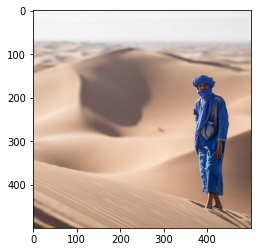

In [2]:
# import the image
from skimage import io
image = io.imread('image.jpg') 
plt.imshow(image);

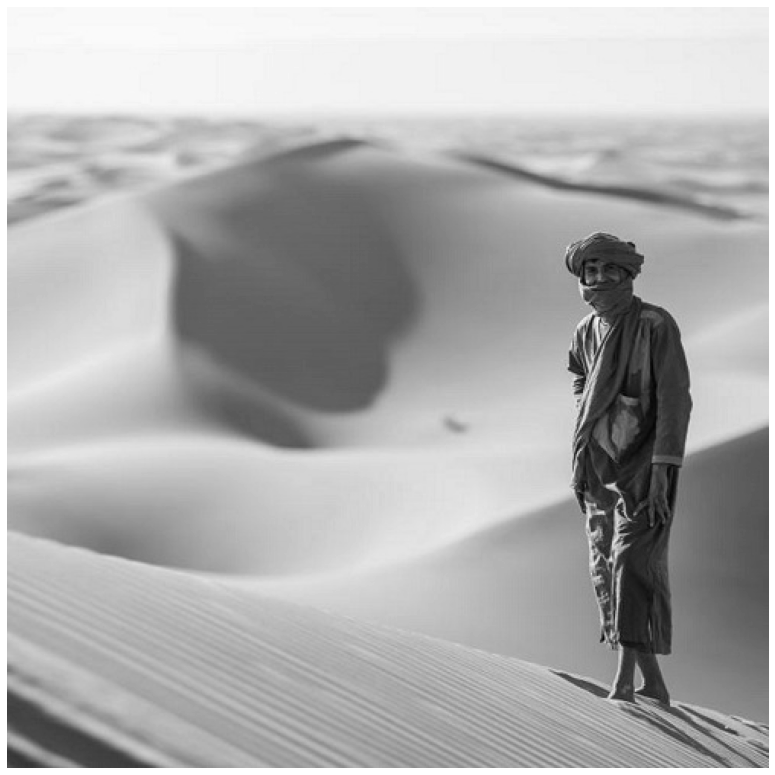

In [3]:
image_gray = color.rgb2gray(image) 
image_show(image_gray);

#### La segmentation  de contour  est initialisée à l'aide d'un contour ou d'une ligne défini par l'utilisateur, autour de la zone d'intérêt, et ce contour se contracte ensuite lentement et est attiré ou repoussé de la lumière et des bords. ( on va choisir un cercle )

In [13]:

def circle_points(resolution, center, radius):   
   #Génère des points qui définissent un cercle sur une image Le centre fait référence au centre du cercle 
    radians = np.linspace(0, 2*np.pi, resolution)   
    c = center[1] + radius*np.cos(radians)#polar co-ordinates
    r = center[0] + radius*np.sin(radians)
    
    return np.array([c, r]).T# Exclure le dernier point car un chemin fermé ne doit pas avoir de points en double
points = circle_points(200, [170, 390], 50)[:-1]

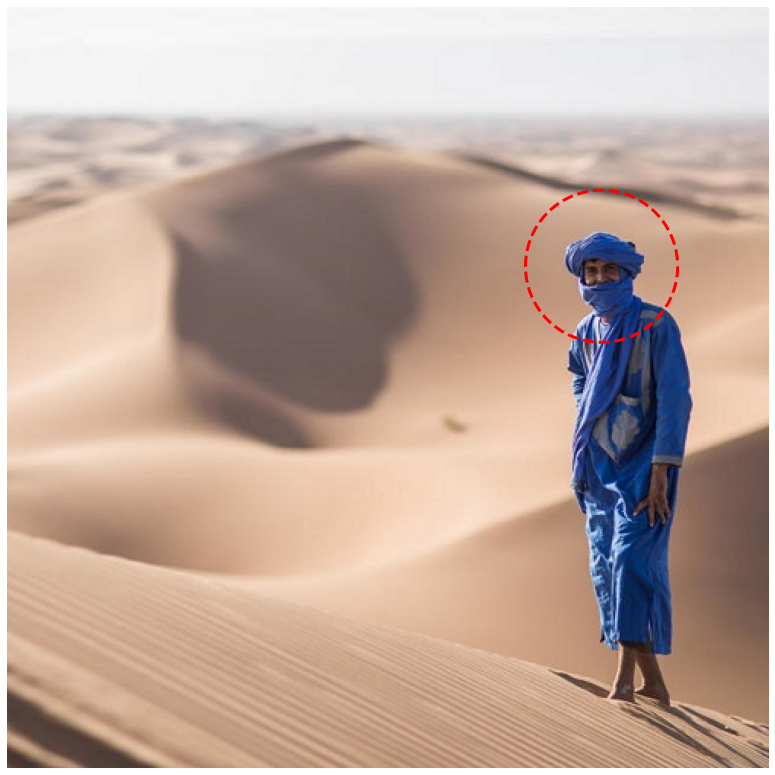

In [5]:
#Les calculs ci-dessus calculent les coordonnées x et y des points à la périphérie du cercle. 
#Puisque nous avons donné une résolution de 600, il calculera 200 points.
fig, ax = image_show(image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)

<ipython-input-6-9bcb9caaa8db>:3: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  snake = seg.active_contour(image_gray, points,alpha=0.16,beta=0.4)


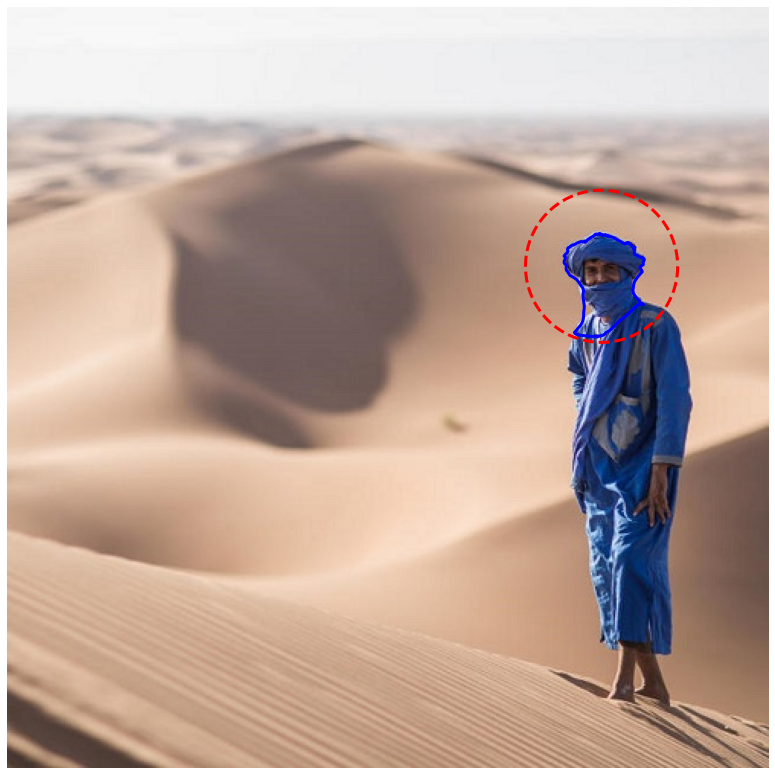

In [6]:
#L'algorithme segmente le soleil à partir du reste
#d'une image en ajustant une courbe fermée sur les bords. alpha beta rends plus rapide et plus lisse 
snake = seg.active_contour(image_gray, points,alpha=0.16,beta=0.4)
fig, ax = image_show(image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3);

In [7]:
image_labels = np.zeros(image_gray.shape, dtype=np.uint8)

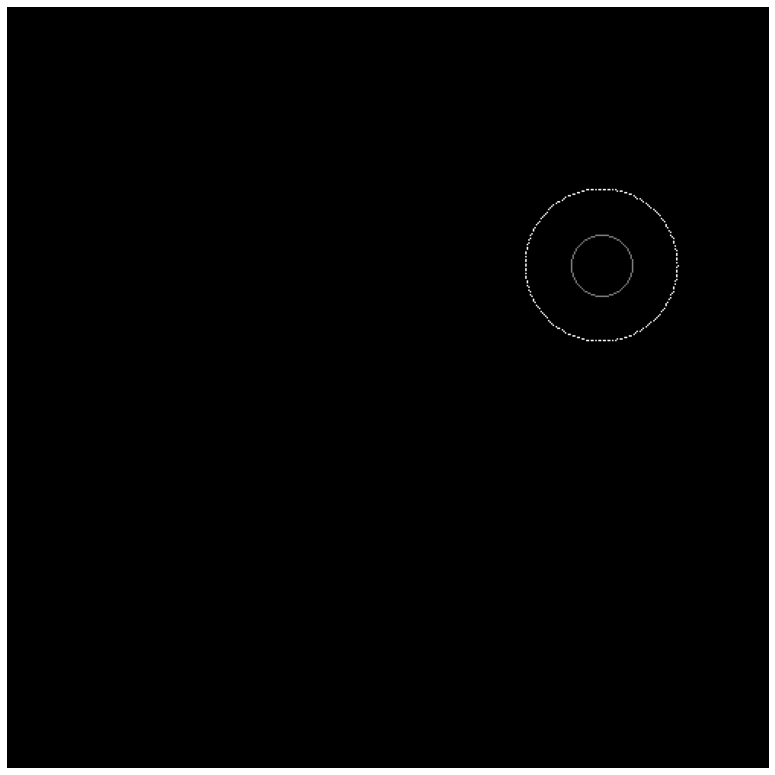

In [8]:
indices = draw.circle_perimeter(170, 390,20)#from here
image_labels[indices] = 1
image_labels[points[:, 1].astype(np.int), points[:, 0].astype(np.int)] = 2
image_show(image_labels);

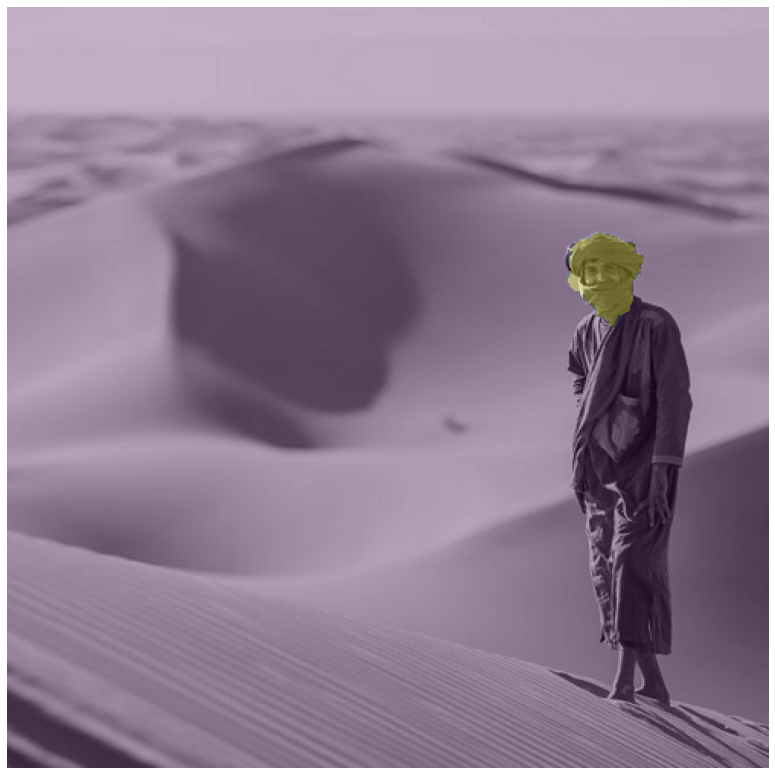

In [9]:
image_segmented = seg.random_walker(image_gray, image_labels, beta = 3000)# Check our results
fig, ax = image_show(image_gray)
ax.imshow(image_segmented == 1, alpha=0.3);

<ipython-input-12-f13cec6e6908>:1: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  image_slic = seg.slic(image,n_segments=155)
<ipython-input-12-f13cec6e6908>:3: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  image_show(color.label2rgb(image_slic, image, kind='avg'));


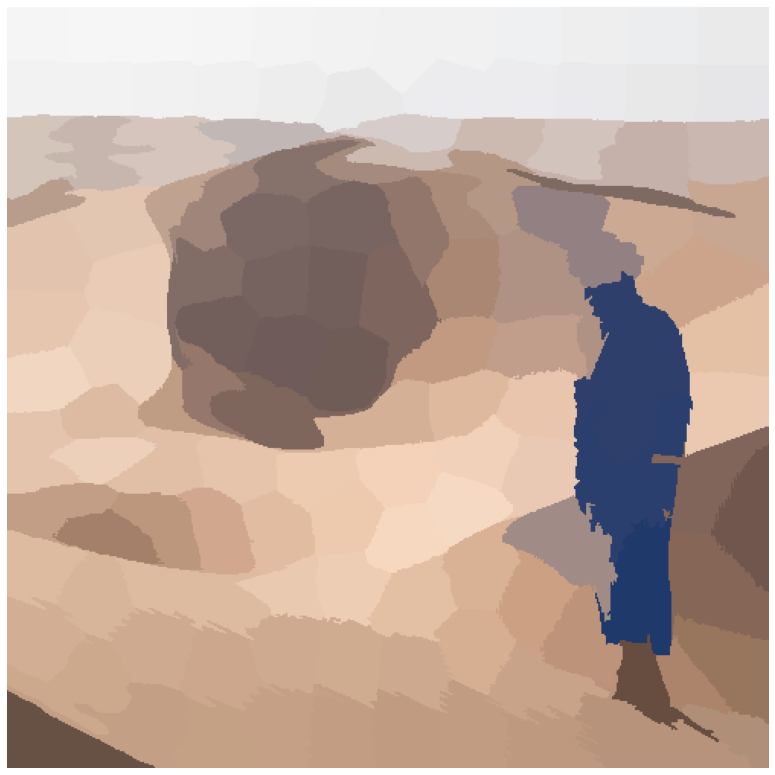

In [12]:
image_slic = seg.slic(image,n_segments=155)
# label2rgb replaces each discrete label with the average interior color
image_show(color.label2rgb(image_slic, image, kind='avg'));

#### Rq : Nous avons réduit cette image de 500 x 500 = 200 000 pixels à  environs 100 régions.


In [ ]:
contraite géometrique ...............;; splitandmerge( methode de segmentation par division ===> sursegmentation )